In [1]:
import tensorflow

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory

2025-01-30 17:12:51.642556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-30 17:12:51.664960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-30 17:12:51.665000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 17:12:51.678878: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-30 17:12:52.583569: W tensorflow/compiler/tf

In [7]:

train_dataset = image_dataset_from_directory(
 "data/train",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   "data/test",
    image_size=(224, 224),
    batch_size=32)
validata = image_dataset_from_directory(
   "data/valid",
    image_size=(224, 224),
    batch_size=32)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [8]:
class_names=train_dataset.class_names

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)


In [6]:
inputs = keras.Input(shape=(224, 224, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(525, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()




Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 525)            │       134,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,115,353 (4.25 MB)

 Trainable params: 1,114,387 (4.25 MB)

 Non-trainable params: 966 (3.77 KB)

In [7]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bird525.keras",
        save_best_only=True,
        monitor="val_loss")]

In [9]:
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=validata,
    callbacks=callbacks
)

Epoch 1/25


I0000 00:00:1722328053.393943   22516 service.cc:145] XLA service 0x7a9620007100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722328053.394116   22516 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-07-30 13:57:33.504568: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-30 13:57:33.812656: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1722328055.598313   22698 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1919', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1722328055.783476   22702 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1853', 160 bytes spill stores, 160 bytes spill lo

   2/2645 ━━━━━━━━━━━━━━━━━━━━ 3:01 69ms/step - accuracy: 0.0000e+00 - loss: 6.3763   

I0000 00:00:1722328067.237988   22516 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2644/2645 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0308 - loss: 5.7746

I0000 00:00:1722328244.476350   25261 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1919', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1722328244.823204   25263 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1853', 204 bytes spill stores, 204 bytes spill loads

I0000 00:00:1722328244.881363   25256 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1919', 540 bytes spill stores, 540 bytes spill loads



2645/2645 ━━━━━━━━━━━━━━━━━━━━ 208s 72ms/step - accuracy: 0.0308 - loss: 5.7741 - val_accuracy: 0.3352 - val_loss: 3.1357
Epoch 2/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 177s 67ms/step - accuracy: 0.2574 - loss: 3.4839 - val_accuracy: 0.5977 - val_loss: 1.8118
Epoch 3/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 177s 67ms/step - accuracy: 0.4521 - loss: 2.4329 - val_accuracy: 0.7131 - val_loss: 1.2493
Epoch 4/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 178s 67ms/step - accuracy: 0.5559 - loss: 1.9346 - val_accuracy: 0.7627 - val_loss: 1.0149
Epoch 5/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 177s 67ms/step - accuracy: 0.6152 - loss: 1.6339 - val_accuracy: 0.7848 - val_loss: 0.9492
Epoch 6/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 178s 67ms/step - accuracy: 0.6625 - loss: 1.4142 - val_accuracy: 0.8229 - val_loss: 0.7794
Epoch 7/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 177s 67ms/step - accuracy: 0.6913 - loss: 1.2717 - val_accuracy: 0.8461 - val_loss: 0.6879
Epoch 8/25
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 178s 67ms/step - accuracy: 0.7194 - lo

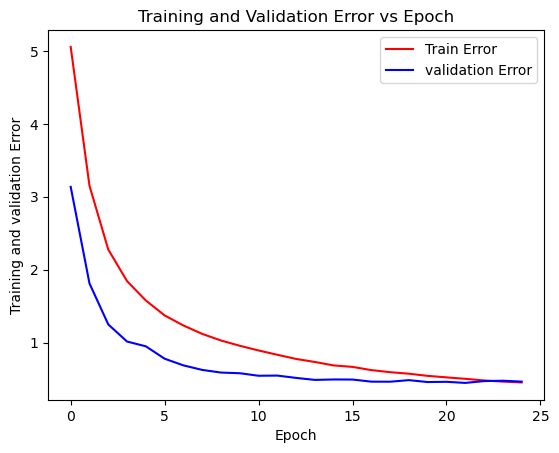

In [11]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], color='red',label='Train Error')
plt.plot(history.history['val_loss'],color='blue',label='validation Error')

plt.title('Training and Validation Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training and validation Error')
plt.legend(loc='upper right')
plt.show()

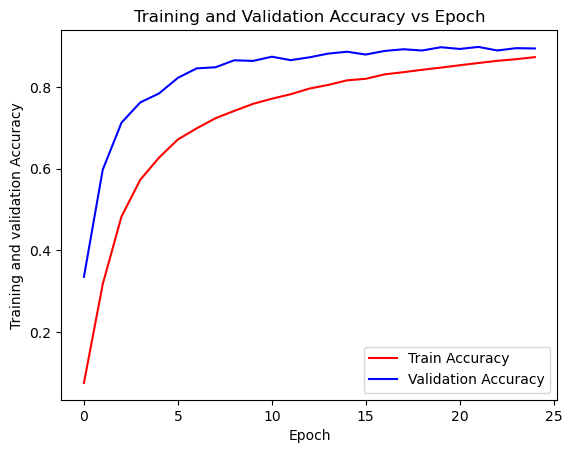

In [12]:
plt.plot(history.history['accuracy'],color='red',label='Train Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training and validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:

test_loss, test_accuracy = model.evaluate(test_dataset)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9246 - loss: 0.2946


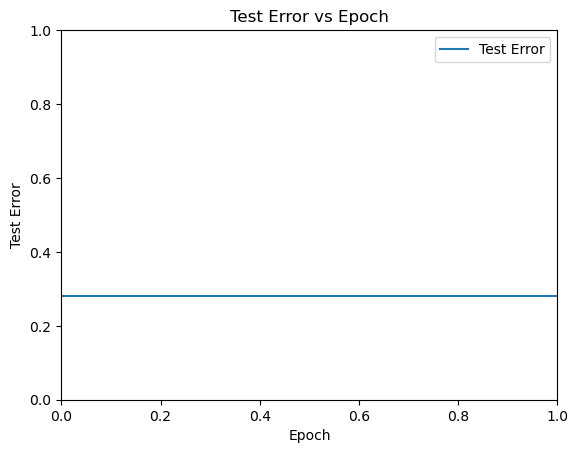

In [24]:

plt.axhline(y=test_loss,label='Test Error')

plt.title('Test Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.legend(loc='upper right')
plt.show()



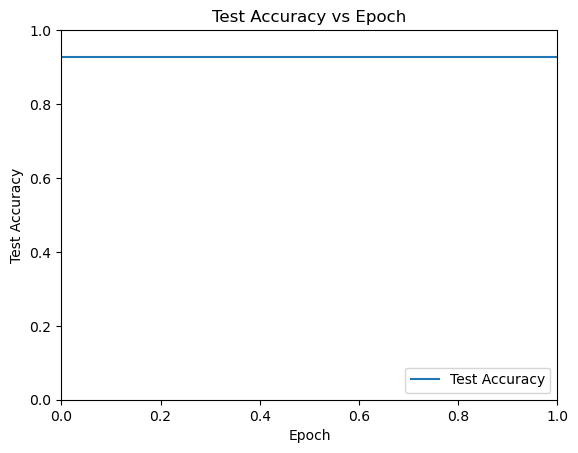

In [25]:
plt.axhline(y=test_accuracy,  label='Test Accuracy')

plt.title('Test Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend(loc='lower right')
plt.show()

In [26]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
def predict(model, img):
    img_array = img_to_array(images[i].numpy())
    img_array = np.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


2024-07-30 15:47:03.296398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


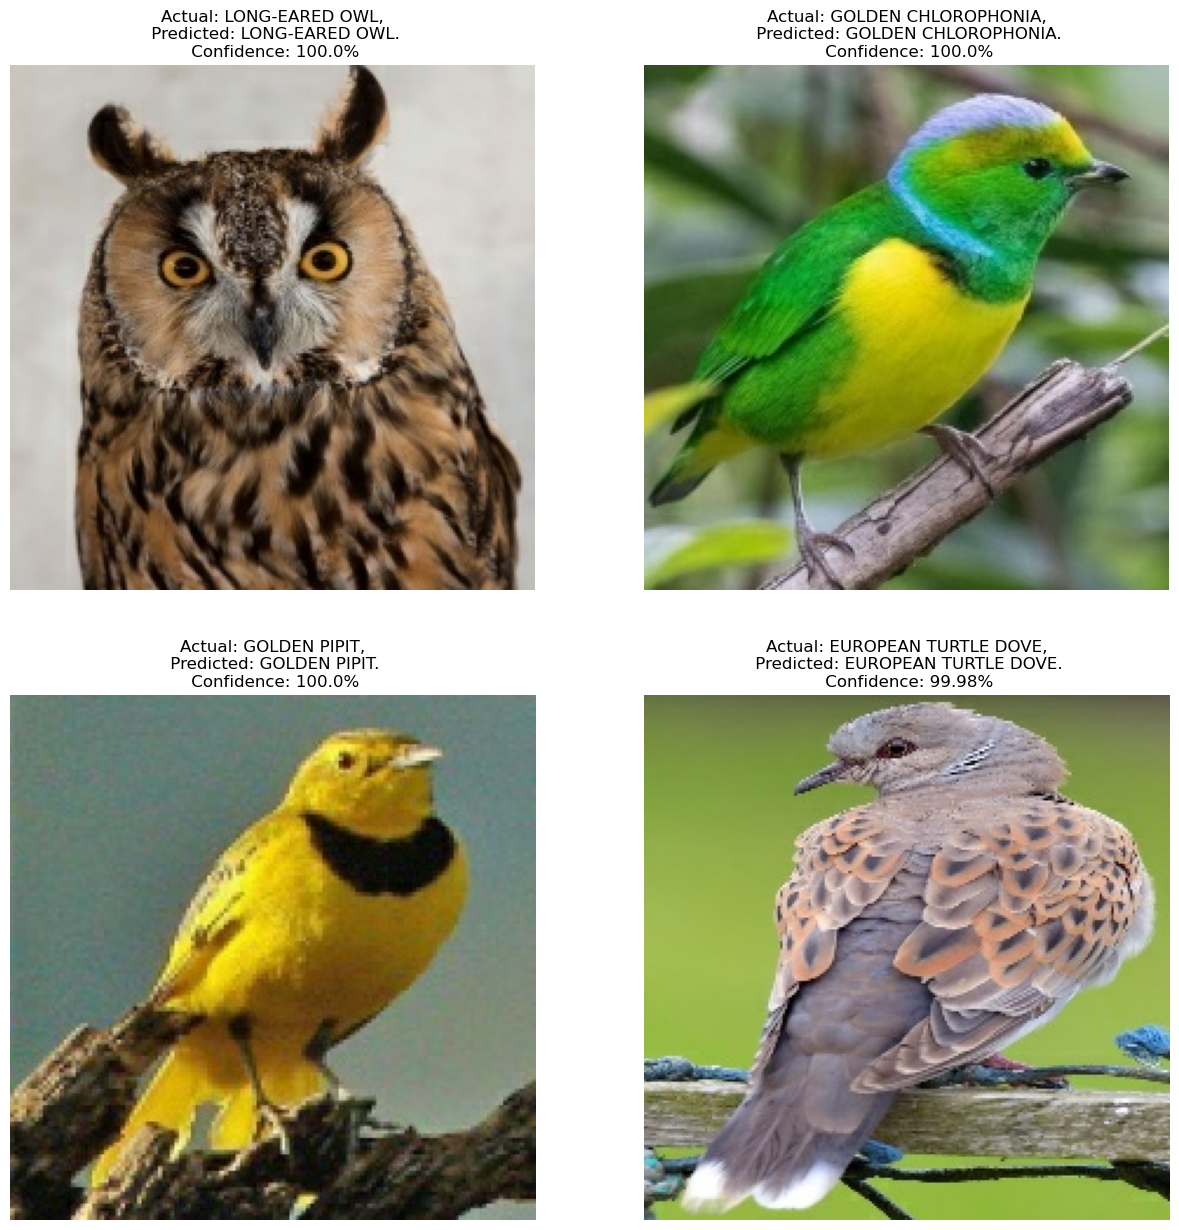

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory,load_img,img_to_array
test_dataset = image_dataset_from_directory(
   "data/test",
    image_size=(224, 224),
    batch_size=32)

2024-07-30 22:50:15.516684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 22:50:15.566821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 22:50:15.566934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 22:50:15.599403: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 22:50:16.983613: W tensorflow/compiler/tf

Found 2625 files belonging to 525 classes.


2024-07-30 22:50:19.850056: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-07-30 22:50:19.850102: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: joston-saldanha-ASUS-TUF-Gaming-A15-FA506IC-FA506IC
2024-07-30 22:50:19.850116: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: joston-saldanha-ASUS-TUF-Gaming-A15-FA506IC-FA506IC
2024-07-30 22:50:19.850321: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.183.1
2024-07-30 22:50:19.850357: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.183.1
2024-07-30 22:50:19.850369: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.183.1


In [23]:
def predict (img):
    model=keras.models.load_model('bird525.keras')
    input_image=np.expand_dims(img, 0)
    
    prediction=model.predict(input_image)
    
    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(100 * (np.max(prediction)),2)
    return predicted_class, confidence
    



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


2024-07-31 00:12:34.683640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


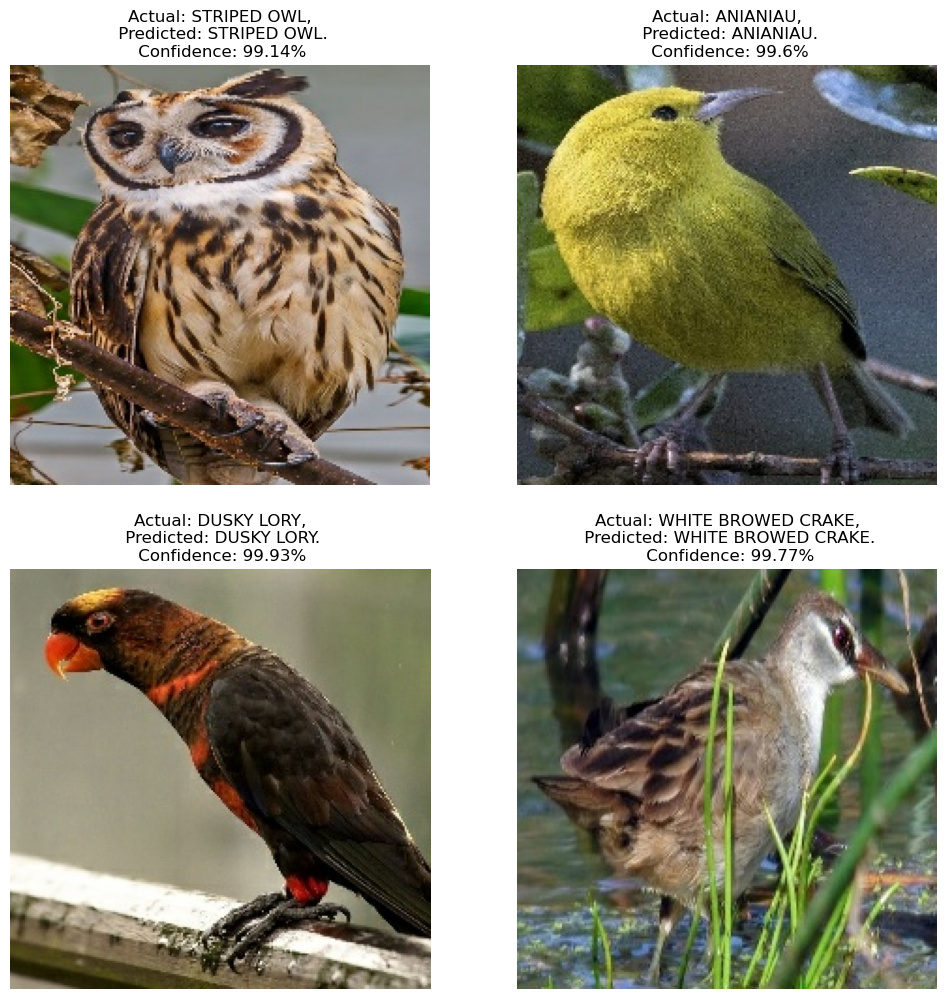

In [24]:
plt.figure(figsize=(12,12))
for images,label in test_dataset.take(1):
    for i in range(4):
        ax=plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted,confidence=predict(images[i].numpy())
        actual=class_names[label[i]]
        plt.title(f"Actual: {actual},\n Predicted: {predicted}.\n Confidence: {confidence}%")
        plt.axis("off")
        
